In [1]:
import pandas as pd
import AdsAbsRequester
from collections import Counter

In [2]:
token="KDaPKeB4q7noKbg00u3gjlqszxYEWQ94YguJ0OmR"
requester=AdsAbsRequester.Requester(token,'testRequest')
years=range(2000,2021)

In [6]:
def request(year: int, additional:str='', propertyField: str='',doctypeField:str='')->int:
    searchCriteria=('year:'+str(year),'database:astronomy')
    if propertyField!='':
        if propertyField not in ('refereed','notrefereed'):
            raise ValueError()
        else:
            searchCriteria=searchCriteria+('property:'+propertyField,)
    if doctypeField!='':
        if doctypeField not in ('article','eprint','inproceedings','abstract','catalog'):
            raise ValueError()
        else:
            searchCriteria=searchCriteria+('doctype:'+doctypeField,)
    if additional!='':
        searchCriteria=searchCriteria+(additional,)
    requester.setParams(searchCriteria)
    requester.loadData()
    count=len(requester.response.json()['response']['docs'])
    return count

In [7]:
statByYears=pd.DataFrame(columns=['year','ML refereed', 'ML non refereed', 'all refereed', 'all non refereed'])
for year in years:
    print(year)
    counts={'year':year}
    c=request(year,propertyField='refereed',additional='abs:"machine learning"')
    counts['ML refereed']=c
    c=request(year,propertyField='notrefereed',additional='abs:"machine learning"')
    counts['ML non refereed']=c
    c=request(year,propertyField='refereed')
    counts['all refereed']=c
    c=request(year,propertyField='notrefereed')
    counts['all non refereed']=c
    statByYears=statByYears.append(counts,ignore_index=True)

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


KeyboardInterrupt: 

In [8]:
statByYears

,year,ML refereed,ML non refereed,all refereed,all non refereed
0,2000,0,2,6,963
1,2001,3,7,1993,548
2,2002,0,6,509,1381
3,2003,0,6,275,1031
4,2004,8,7,340,326
5,2005,4,11,839,281
6,2006,8,8,1709,1629
7,2007,13,7,1827,330
8,2008,10,26,725,1905
9,2009,14,21,165,404


In [10]:
import matplotlib.pyplot as plt

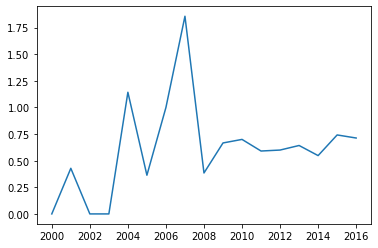

In [11]:
plt.plot(statByYears['year'],statByYears['ML refereed']/statByYears['ML non refereed'])

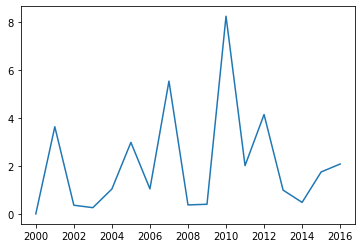

In [12]:
plt.plot(statByYears['year'],statByYears['all refereed']/statByYears['all non refereed'])

In [14]:
searchCriteria=('year:2016','database:astronomy','property:refereed')
requester.setParams(searchCriteria)
requester.loadData()
count=len(requester.response.json()['response']['docs'])
count

1545